In [2]:
import torch
import torch.nn as nn
from torch.autograd import grad

import matplotlib.pyplot as plt

from pinns.models import FF
from pinns.derivatives import Derivative

from pinns.samplers import RandomSampler

In [3]:
sampler = RandomSampler({'t': [0, 0.5], 'x': [0, 1]}, 5)

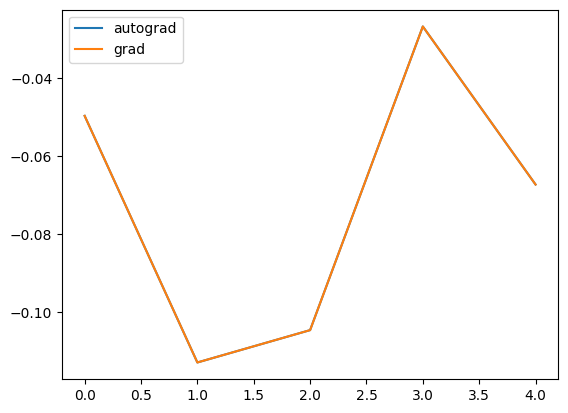

In [19]:
pinn = FF([2, 5, 1], activ=nn.Tanh(), biases = False)

pts = sampler()
t, x = pts['t'], pts['x']

y = pinn(pts)

d1 = Derivative(method = 'autograd')
d1x = d1(y, x, orders = 2)

d2 = Derivative(method = 'findiff', model = pinn)
# d2x = d2(y, x, orders = 2)

d3 = grad(y, x, torch.ones_like(y), create_graph=True)[0]
d3x = grad(d3, x, torch.ones_like(y), create_graph=True)[0]

# d2x = d2(y, x)

plt.plot(d1x.detach(), label='autograd')
# plt.plot(d2x.detach(), label='diff')
plt.plot(d3x.detach(), label='grad')
plt.legend()
plt.show()